In [5]:
import atlite
import matplotlib.pyplot as plt
import cartopy.crs as ccrs  

from cartopy.crs import PlateCarree as plate
import cartopy.io.shapereader as shpreader

In [6]:
shpfilename = shpreader.natural_earth(
    resolution="10m", category="cultural", name="admin_0_countries"
)

/home/ivanra/miniconda3/envs/pypsa-china/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_countries.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


In [2]:
cutout = atlite.Cutout("/home/ivanra/documents/PyPSA-China-PIK/resources/cutouts/China-2020-original.nc"   )

/home/ivanra/miniconda3/envs/pypsa-china/lib/python3.12/site-packages/atlite/resource.py:90: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.15.
  warnings.warn(msg, FutureWarning)


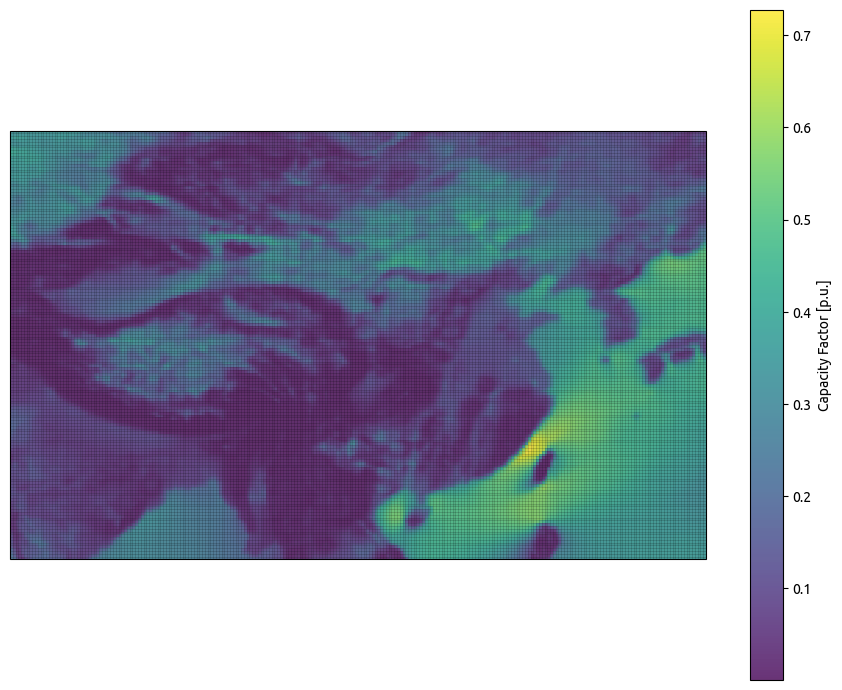

In [8]:
cap_factors = cutout.wind(turbine="Vestas_V112_3MW", capacity_factor=True)
cells = cutout.grid
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(9, 7))
cap_factors.name = "Capacity Factor"
cap_factors.plot(ax=ax, transform=plate(), alpha=0.8)
plot_grid_dict = dict(
    alpha=0.1,
    edgecolor="k",
    zorder=4,
    aspect="equal",
    facecolor="None",
    transform=plate(),
)
cells.plot(ax=ax, **plot_grid_dict)
fig.tight_layout();

/home/ivanra/miniconda3/envs/pypsa-china/lib/python3.12/site-packages/atlite/resource.py:90: FutureWarning: 'add_cutout_windspeed' for wind turbine
power curves will default to True in atlite relase v0.2.15.
  warnings.warn(msg, FutureWarning)


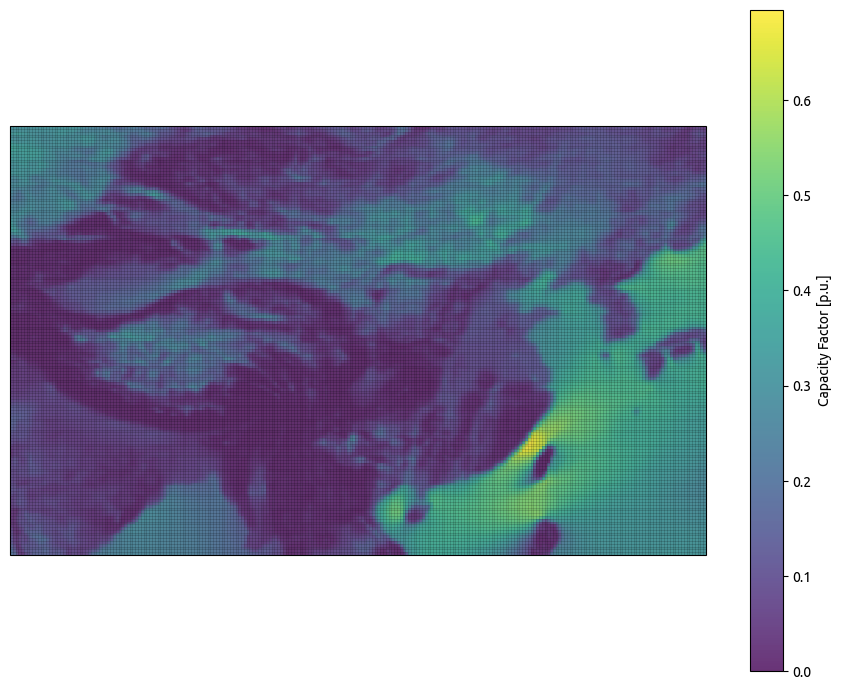

In [10]:

cap_factors = cutout.wind(turbine="NREL_ReferenceTurbine_5MW_offshore", capacity_factor=True)
cells = cutout.grid
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(9, 7))
cap_factors.name = "Capacity Factor"
cap_factors.plot(ax=ax, transform=plate(), alpha=0.8)
plot_grid_dict = dict(
    alpha=0.1,
    edgecolor="k",
    zorder=4,
    aspect="equal",
    facecolor="None",
    transform=plate(),
)
cells.plot(ax=ax, **plot_grid_dict)
fig.tight_layout();

In [11]:
import xarray as xr

In [47]:
ds_offw = xr.open_dataset("/home/ivanra/documents/PyPSA-China-PIK/resources/profile_offwind.nc")
ds_ow = xr.open_dataset("/home/ivanra/documents/PyPSA-China-PIK/resources/profile_onwind.nc")

array(['Fujian', 'Guangdong', 'Guangxi', 'Hainan', 'Hebei', 'Jiangsu',
       'Liaoning', 'Shandong', 'Shanghai', 'Tianjin', 'Zhejiang'],
      dtype='<U9')

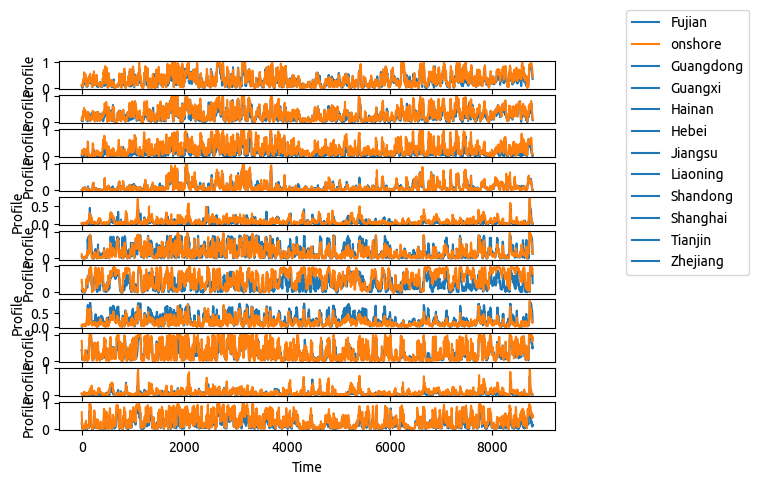

In [52]:
fig, ax = plt.subplots(len(ds_offw.bus.values),1, sharex=True)
for i, bus in enumerate(ds_offw.coords['bus']):
    ax[i].plot(ds_offw["profile"].sel(bus=bus), label=f'{bus.values}')
    ax[i].plot(ds_ow["profile"].sel(bus=bus), label=f'onshore' if i==0 else None)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Profile')
fig.legend(bbox_to_anchor=(1.0, 1), loc='upper left')


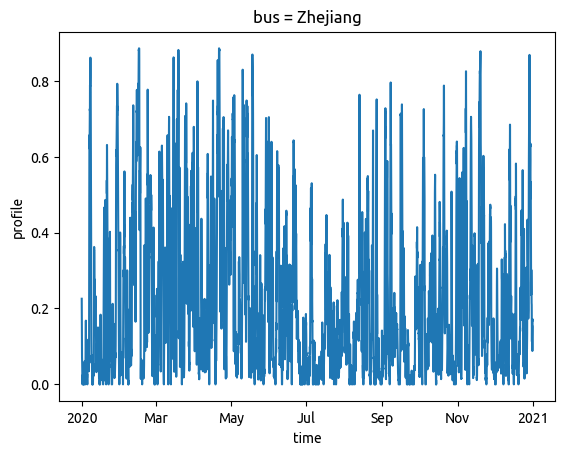

In [38]:
ds_offw.sel(bus=bus).sum('x').sum('y').profile.plot()